# Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-v0_8-talk')

In [21]:
# load scaled and imputed data --> we will model with this data
X_train = pd.read_csv('X_train_model.csv', sep=',')
X_test = pd.read_csv('X_test_model.csv', sep=',')
X_real_test = pd.read_csv('X_real_test_model.csv', sep=',')
y_train = pd.read_csv('y_train_model.csv', sep=',')
y_test = pd.read_csv('y_test_model.csv', sep=',')

# load original version (ov) data (with aggregated elements) to compare
train_ov_df = pd.read_csv('train_complete.csv', sep = ',')
real_test_ov_df = pd.read_csv('test_complete.csv', sep = ',')

In [22]:
# Only for data exploration I add Incidence (Y_train to X_train) --> I need this for correlations
X_train['Incidence'] = y_train

In [23]:
# We want to explore ov with columns that we are going to model
# Different variables of columns to keep because train has now 'Incidence' and test doesn't
columns_train_keep = X_train.drop(columns=['Age_65-69', 'Age_70-74', 'Age_75-79', 'Age_80-84', 'Age_85-89', 'Age_90-94']).columns
columns_real_test_keep = X_real_test.drop(columns=['Age_65-69', 'Age_70-74', 'Age_75-79', 'Age_80-84', 'Age_85-89', 'Age_90-94']).columns

In [24]:
# eliminating all the columns with lags and elements that have more than 25% missing data
    # we eliminated this columns in previous notebook (2_Imputation) before imputing data
train_ov = train_ov_df[columns_train_keep]
real_test_ov = real_test_ov_df[columns_real_test_keep]

#Reincorporating State_Name and Age
train_ov['State_Name'] = train_ov_df['State_Name']
real_test_ov['State_Name'] = real_test_ov_df['State_Name']


train_ov['Age'] = train_ov_df['Age']
real_test_ov['Age'] = real_test_ov_df['Age']

C:\Users\adria\AppData\Local\Temp\ipykernel_2008\2175999674.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ov['State_Name'] = train_ov_df['State_Name']
C:\Users\adria\AppData\Local\Temp\ipykernel_2008\2175999674.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_test_ov['State_Name'] = real_test_ov_df['State_Name']
C:\Users\adria\AppData\Local\Temp\ipykernel_2008\2175999674.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [25]:
# X_train has more columns because of the Age dummies
train_ov.shape , X_train.shape

((4500, 62), (3375, 66))

## Correlation of variables with Incidence
This will be useful to understand from the variables we have, which one has a greater impact on the health of persons

In [27]:
# To explore correlation of:
    # Incidence with pullutants --> I want to consider age
        # but age is in strings and ranges, so I need to transform it to a numeric categorical ordered variable
        # that way, we can analyze older ages in the correlation matrix
# With help and orientation from Vijay 

age_map = {'65-69': 1,
           '70-74': 2,
           '75-79': 3,
           '80-84': 4,
           '85-89': 5,
           '90-94': 6,
           'SLvl': .9}


train_ov['Age_num'] = train_ov['Age'].map(age_map)
train_ov['Age_num'] = pd.to_numeric(train_ov['Age_num'])    

C:\Users\adria\AppData\Local\Temp\ipykernel_2008\466538593.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ov['Age_num'] = train_ov['Age'].map(age_map)
C:\Users\adria\AppData\Local\Temp\ipykernel_2008\466538593.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ov['Age_num'] = pd.to_numeric(train_ov['Age_num'])


We can observe that the pollutants with greater negative correlation on the incidence don't change in the original data and in the scaled and imputed data: 

| Variable| Original data correlation | Scaled and imputed data correlation|
|-------|----------|------|
|X1st_Max_Value_min_Lead_PM2.5_LC |	-0.550 | -0.5617 |
|Arithmetic_Mean_min_Lead_PM2.5_LC | -0.5505 | -0.5617 |
|X1st_Max_Value_min_Manganese_PM2.5_LC | -0.5024 |  -0.5134 |
|Arithmetic_Mean_min_Manganese_PM2.5_LC | -0.5024 | -0.5134 |
|Arithmetic_Mean_min_Chromium_PM2.5_LC | -0.4964 | -0.5080 |
|X1st_Max_Value_min_Chromium_PM2.5_LC | -0.4964 | -0.5080 |

The same happens for the variables with positive correlation:

| Variable| Original data correlation | Scaled and imputed data correlation|
|-------|----------|------|
|Year |	0.7955 | 0.7937 |
|Arithmetic_Mean_mean_Chromium_PM2.5_LC_l2| 0.2184 | 0.2402 |
|X1st_Max_Value_mean_Chromium_PM2.5_LC | 0.1931 |  0.2097 |
|Arithmetic_Mean_mean_Chromium_PM2.5_LC | 0.1931 | 0.2097 |
|Arithmetic_Mean_max_Chromium_PM2.5_LC | 0.1327 | 0.1842 |

In [61]:
# Original data
# Now the estimation of the correlations with Incidence 
    
correlations = pd.DataFrame(train_ov.drop(columns=['ID', 'State_Name']).
                            corr(numeric_only = True)['Incidence'].
                            sort_values(ascending=False))
correlations.reset_index(inplace = True)
correlations.rename(columns={'index':'Variable', 'Incidence': 'Corr_Incidence'}, inplace=True)
correlations['Corr_Incidence'] = correlations['Corr_Incidence'].round(decimals=2)

In [74]:
# Scaled and Imputed data
# Now the estimation of the correlations with Incidence 
    
correlations_sc_imp = pd.DataFrame(X_train.drop(columns=['ID']).
                            corr(numeric_only = True)['Incidence'].
                            sort_values(ascending=False))
correlations_sc_imp.reset_index(inplace = True)
correlations_sc_imp.rename(columns={'index':'Variable', 'Incidence': 'Corr_Incidence'}, inplace=True)
correlations_sc_imp['Corr_Incidence'] = correlations_sc_imp['Corr_Incidence'].round(decimals=2)

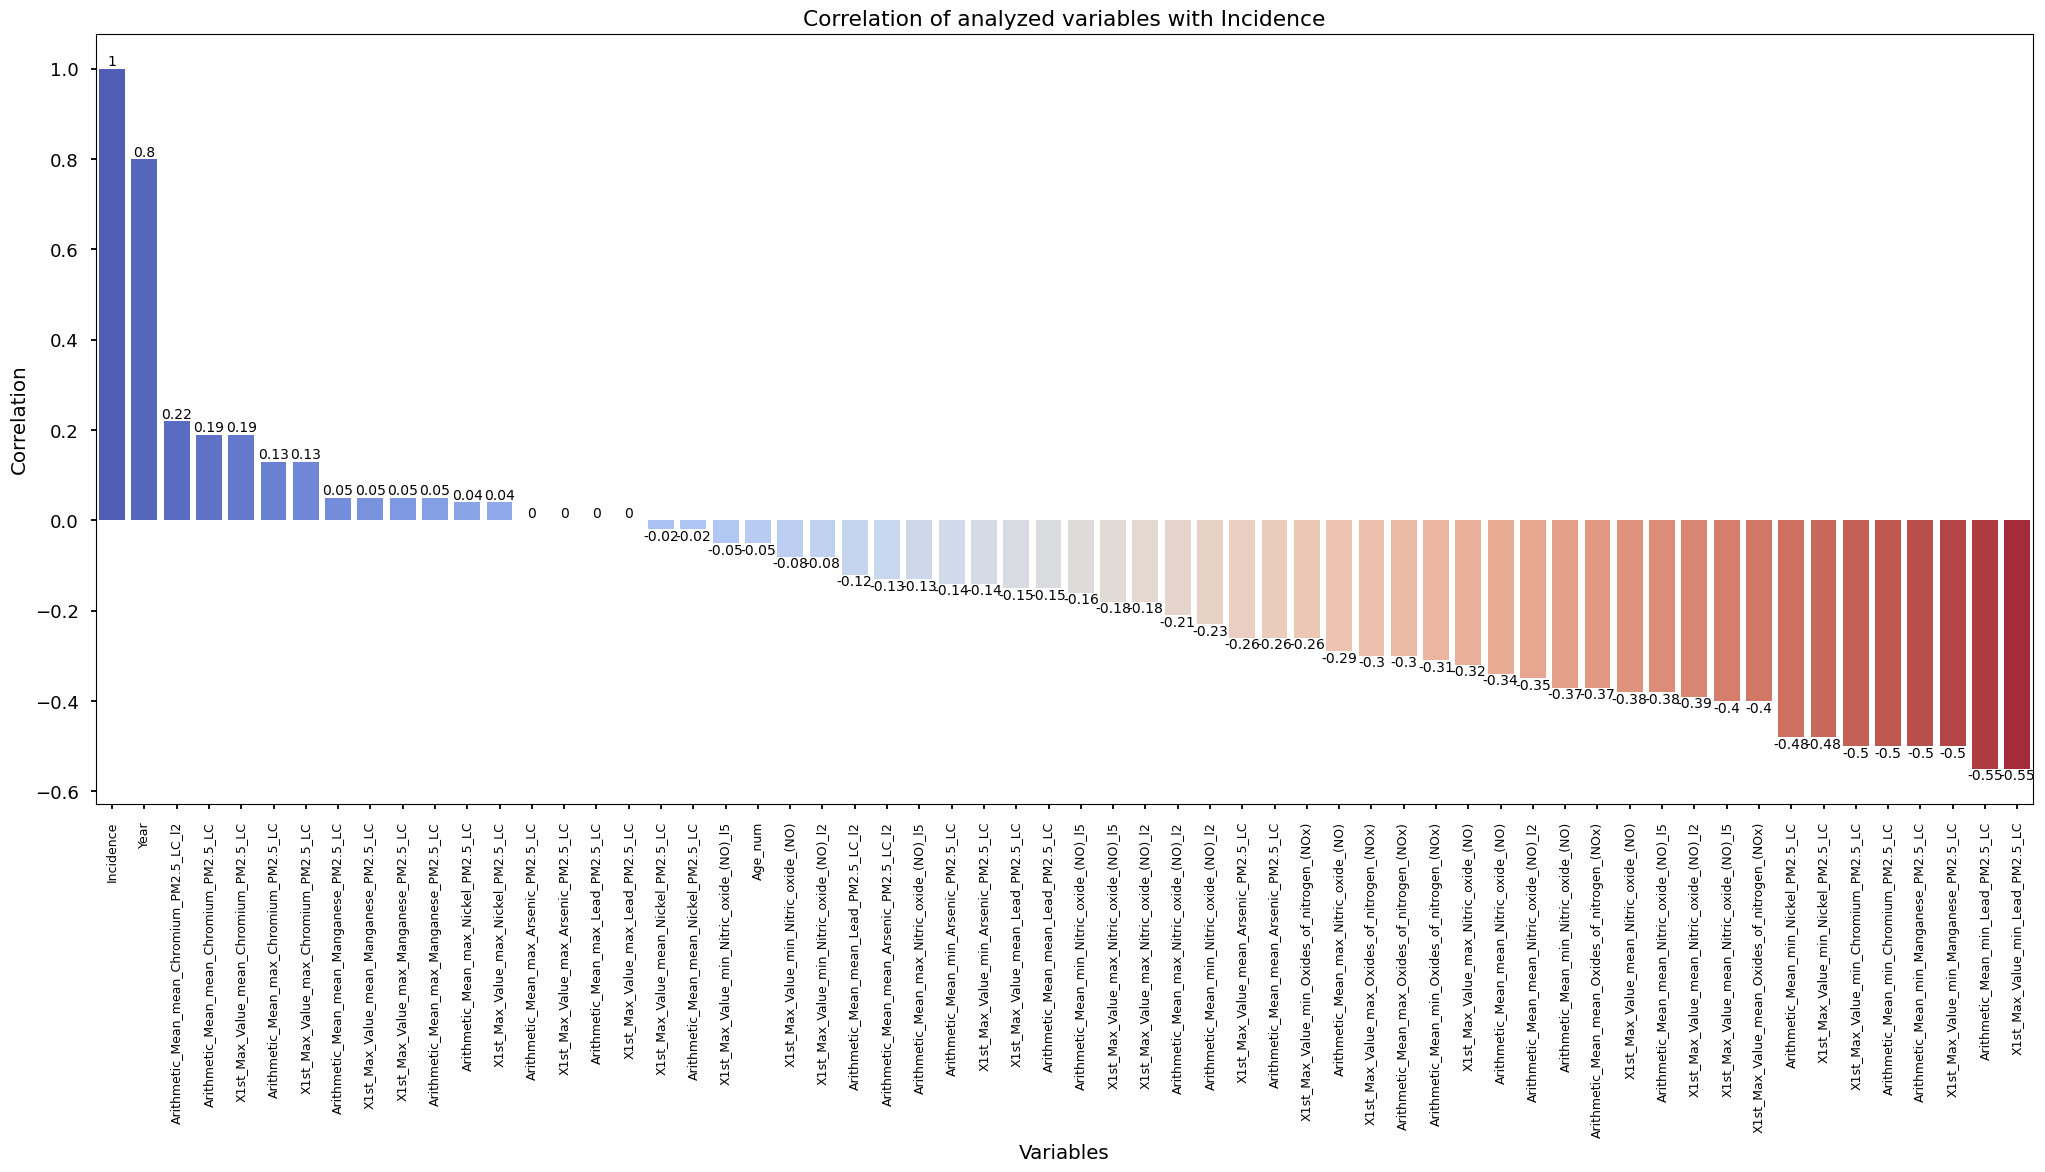

In [58]:
# Graph of the correlations of the original data

fig, ax = plt.subplots(figsize = (25,10))
ax = sns.barplot(x='Variable', y='Corr_Incidence', 
                data = correlations, 
                 palette = 'coolwarm', # 'Spectral',
                errwidth=0)

ax.bar_label(ax.containers[0])
ax.set(xlabel='Variables', 
       ylabel='Correlation', 
       title='Original data: Correlation of analyzed variables with Incidence')

plt.xticks(rotation = 90);

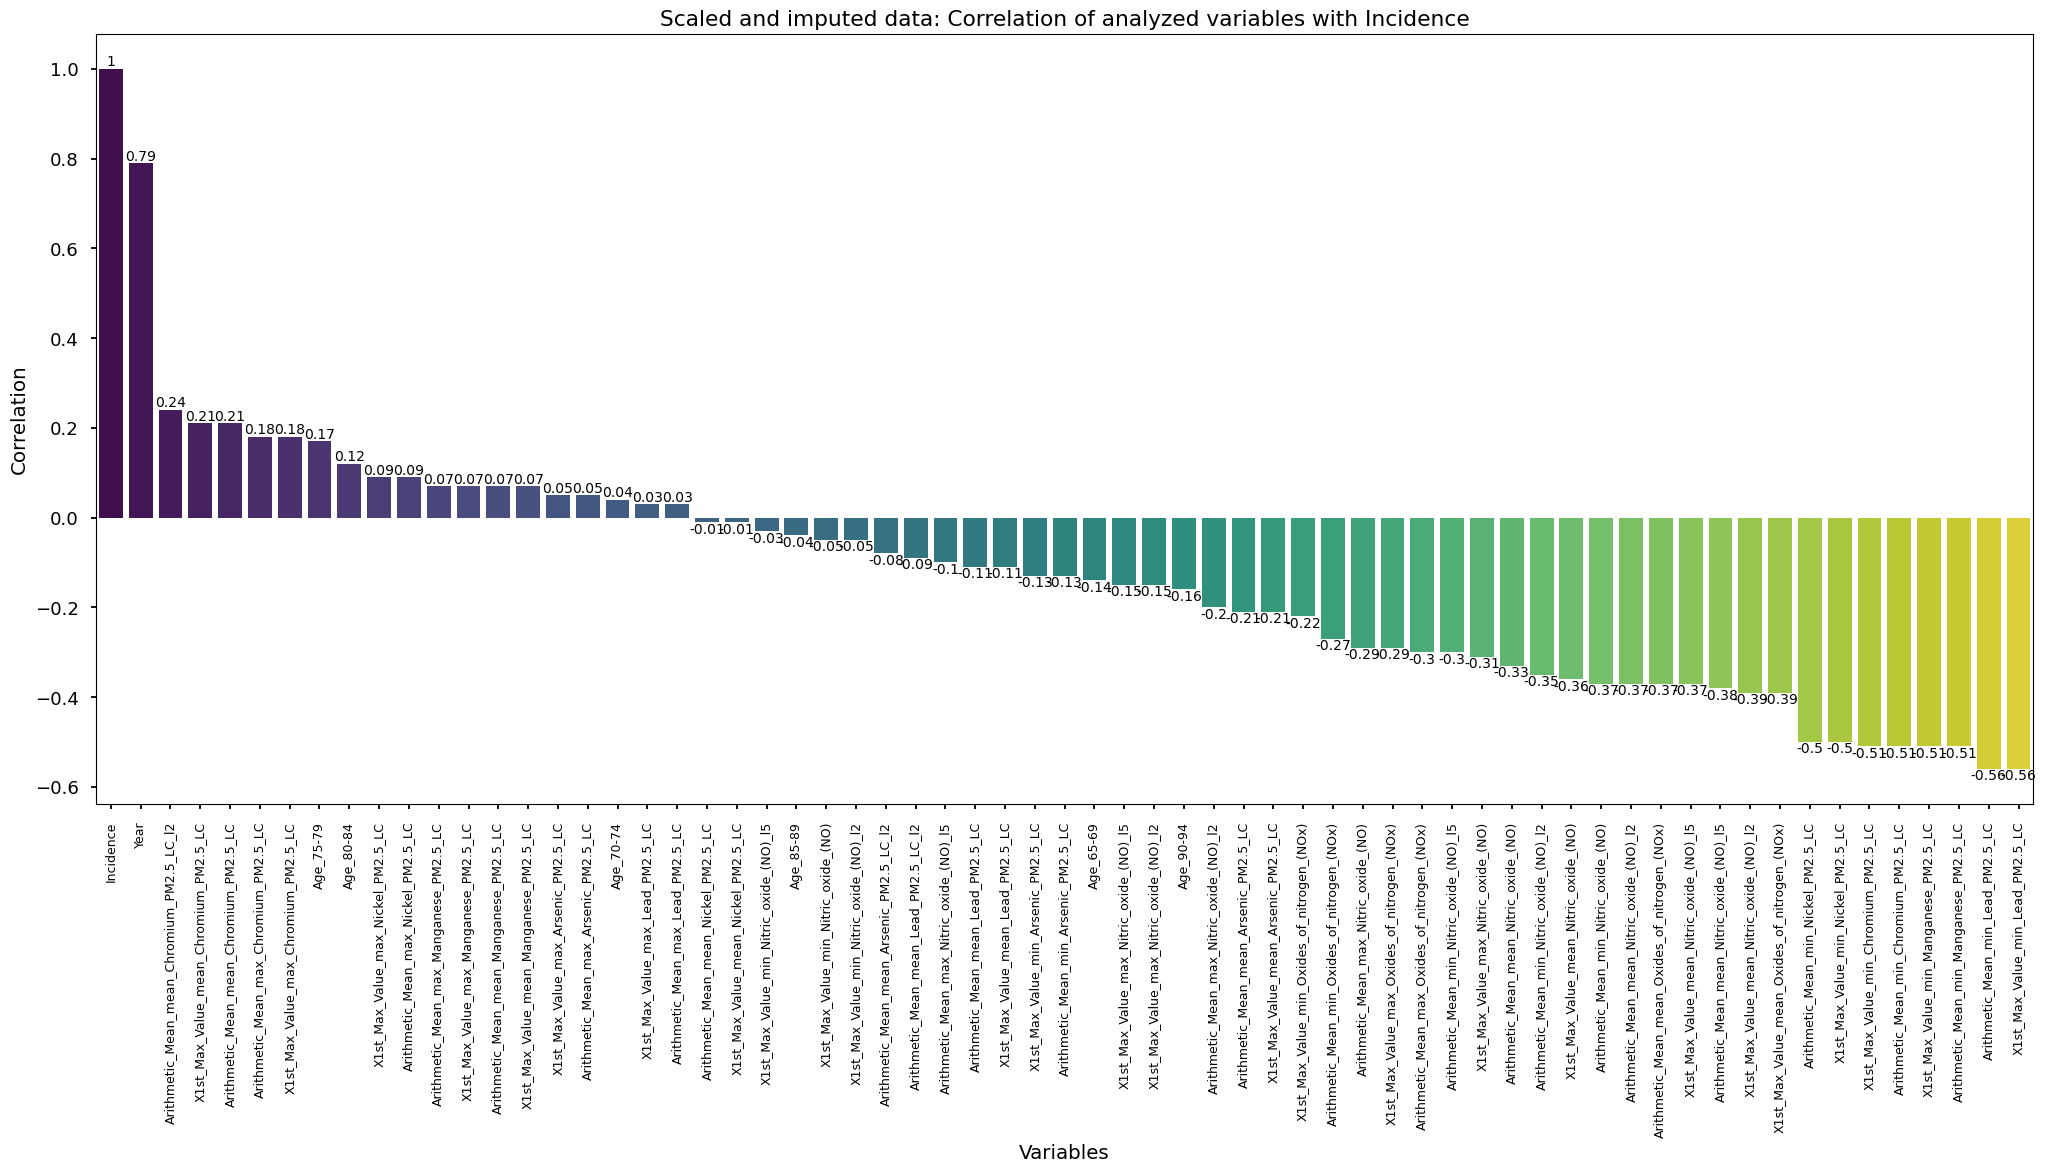

In [77]:
# Graph of the correlations of the scaled and imputed data

fig, ax = plt.subplots(figsize = (25,10))
ax = sns.barplot(x='Variable', y='Corr_Incidence', 
                data = correlations_sc_imp, 
                 palette = 'viridis', # 'Spectral',
                errwidth=0)

ax.bar_label(ax.containers[0])
ax.set(xlabel='Variables', 
       ylabel='Correlation', 
       title='Scaled and imputed data: Correlation of analyzed variables with Incidence')

plt.xticks(rotation = 90);

### Distribution of observations in original data and imputed data follow the same distribution.

It has to be remembered that data was scaled since it is an important step for KNN imputation. Scaling doesn't alter the relation between observations in a variable. Later, missing data was imputed using KNN. So the scales are different.

Here are a couple of random visual examples to show that distributions are the same. 

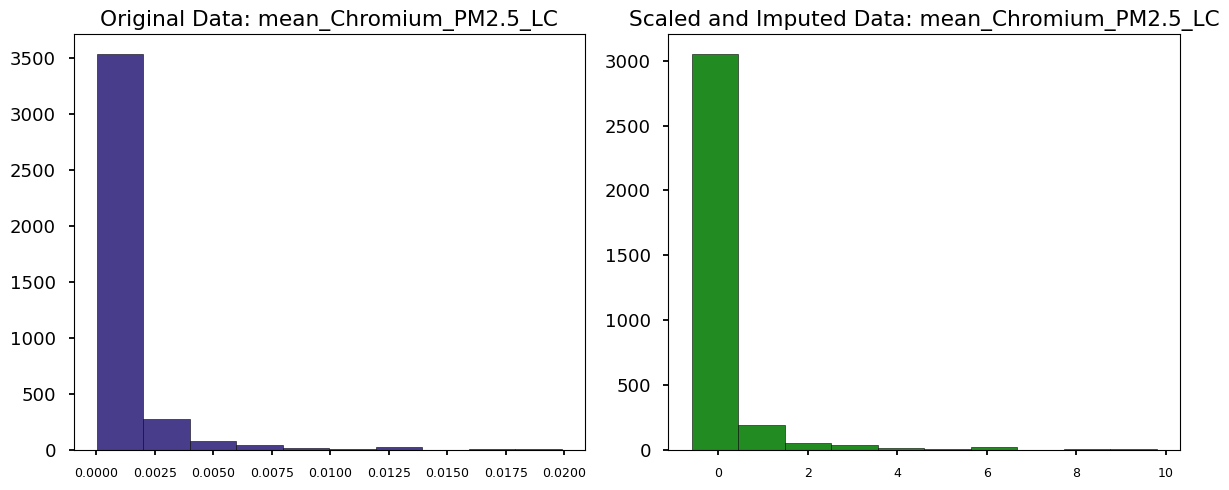

In [26]:
# Paired histograms of original data VS.
plt.rc('xtick', labelsize=9)

plt.figure(figsize = (12 , 5))

# (1, 2, 1) means we have 1 rows, 2 column, and are referencing plot 1.
ax1 = plt.subplot(1, 2, 1)
ax1.hist(train_ov['Arithmetic_Mean_mean_Chromium_PM2.5_LC'], color = 'darkslateblue', edgecolor='black')
ax1.set_title("Original Data: mean_Chromium_PM2.5_LC")
#ax1.set_xlim(0,10)


# (1, 2, 2) means we have 1 rows, 2 column, and are referencing plot 2.
ax2 = plt.subplot(1, 2, 2) #, sharex=ax1
ax2.hist(X_train['Arithmetic_Mean_mean_Chromium_PM2.5_LC'], color = 'forestgreen', edgecolor='black')
ax2.set_title("Scaled and Imputed Data: mean_Chromium_PM2.5_LC")


plt.tight_layout(); # adds more space

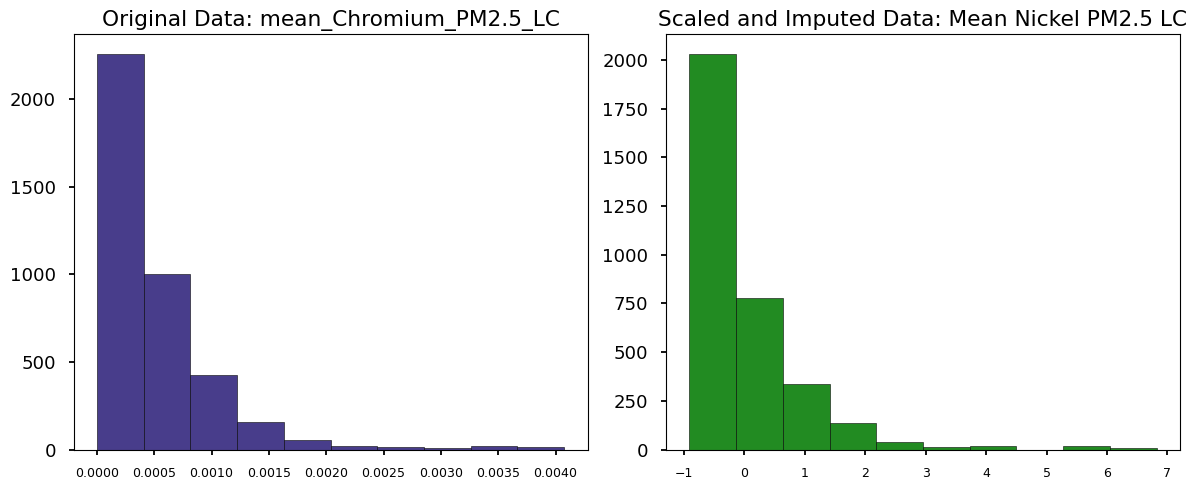

In [128]:
# Paired histograms of original data VS.
plt.rc('xtick', labelsize=9)

plt.figure(figsize = (12 , 5))

# (1, 2, 1) means we have 1 rows, 2 column, and are referencing plot 1.
ax1 = plt.subplot(1, 2, 1)
ax1.hist(train_ov['Arithmetic_Mean_mean_Nickel_PM2.5_LC'], color = 'darkslateblue', edgecolor='black')
ax1.set_title("Original Data: mean_Chromium_PM2.5_LC")
#ax1.set_xlim(0,10)


# (1, 2, 2) means we have 1 rows, 2 column, and are referencing plot 2.
ax2 = plt.subplot(1, 2, 2) #, sharex=ax1
ax2.hist(X_train['Arithmetic_Mean_mean_Nickel_PM2.5_LC'], color = 'forestgreen', edgecolor='black')
ax2.set_title("Scaled and Imputed Data: Mean Nickel PM2.5 LC")


plt.tight_layout(); # adds more space

## Checking normality of our target variable

We prove normality of our Y (incidence) which is predicted by age groups by evaluating the skewness and kurtosis of the information.

From https://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/Simon from the University of Cambride we learn that "There are no official rules about cut-off criteria to decide just how large skew or kurtosis values must be to indicate non-normality" and he even provides academic sources in which it is state that "kurtosis between -2 and +2 are considered acceptable in order to prove normal univariate distribution" and kurtosis between -7 and +7 can also be considered in the ranges of normality.

Considering that and the skewness of the incidence by age group being close to zero, as well as, kurtosis being on average -1.4. We can safely say that our informations follows a normal distribution.

In [86]:
# Checking for skewness
train_ov.groupby('Age').skew(axis = 0, skipna = True)['Incidence']

C:\Users\adria\AppData\Local\Temp\ipykernel_2008\3492214518.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.skew is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_ov.groupby('Age').skew(axis = 0, skipna = True)['Incidence']


Age
65-69    0.388994
70-74    0.477743
75-79    0.504034
80-84    0.488567
85-89    0.477788
90-94    0.460215
Name: Incidence, dtype: float64

In [94]:
# Checking for kurtosis
train_ov.groupby('Age').apply(pd.DataFrame.kurt)['Incidence']

C:\Users\adria\AppData\Local\Temp\ipykernel_2008\1928200273.py:3: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_ov.groupby('Age').apply(pd.DataFrame.kurt)['Incidence']
C:\Users\adria\AppData\Local\Temp\ipykernel_2008\1928200273.py:3: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_ov.groupby('Age').apply(pd.DataFrame.kurt)['Incidence']
C:\Users\adria\AppData\Local\Temp\ipykernel_2008\1928200273.py:3: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to 

Age
65-69   -1.348324
70-74   -1.341120
75-79   -1.414999
80-84   -1.444324
85-89   -1.434234
90-94   -1.399395
Name: Incidence, dtype: float64

### It  can be observed that the distribution of incidence is really different in different years

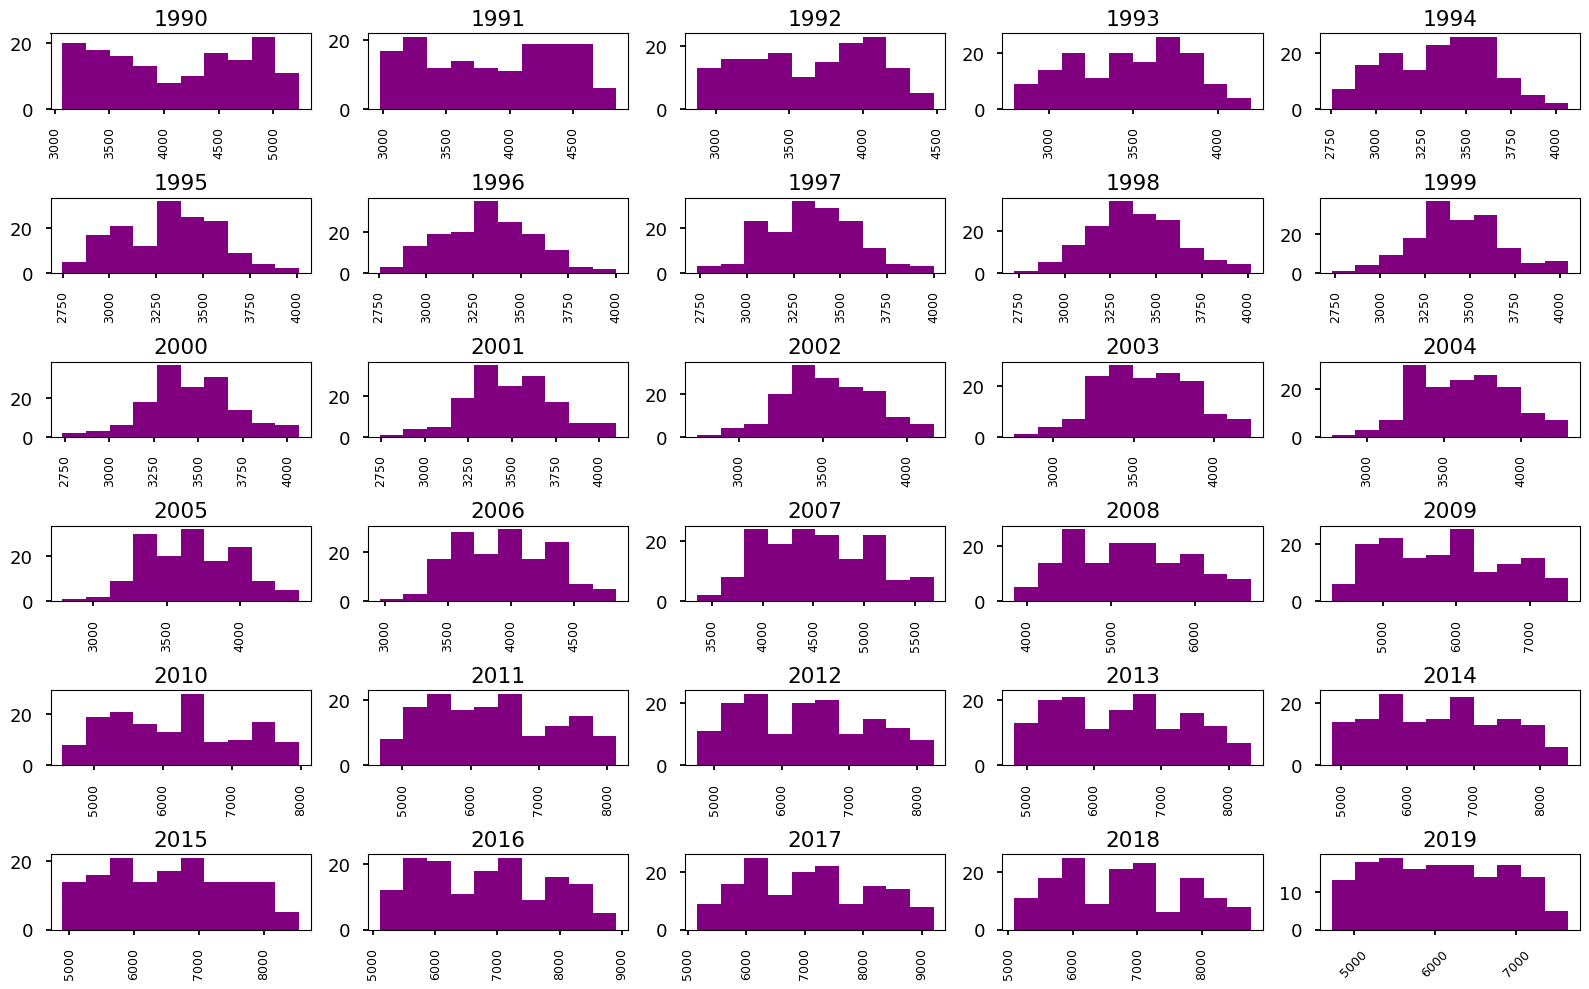

In [133]:
# Some histograms for Incidence

plt.rc('xtick', labelsize=9)

train_ov.hist(column='Incidence', by='Year', figsize=(16,10), color = 'purple')

plt.xticks(rotation = 45)
plt.tight_layout();

### Now we select a coupyear to explore distribution of age by years. It can be observed that the incidence by age groups follows completely different distributions

In [119]:
train_ov_2002 = train_ov[train_ov['Year']==2002]

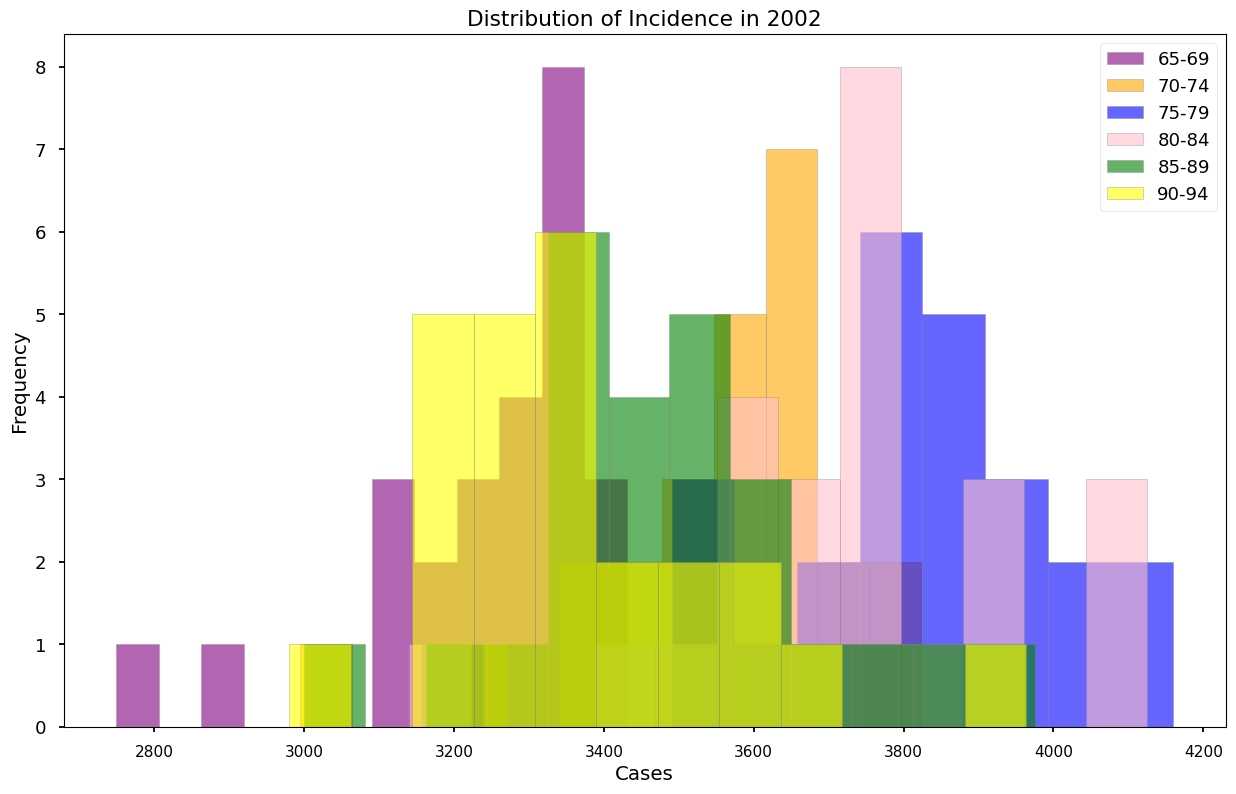

In [139]:
# Code from Graph Gallery https://python-graph-gallery.com/529-multi-group-histogram-pandas/

# Get group names and define colors
group_name = train_ov_2002['Age'].unique()
colors = ['purple', 'orange', 'blue', 'pink', 'green', 'yellow']

plt.rc('xtick', labelsize=11)

# Plot the histograms
for i, group in enumerate(group_name):
    ax = train_ov_2002[train_ov_2002['Age']==group]['Incidence'].hist(figsize=(15, 9),
                                        edgecolor='gray',
                                        bins=12,
                                        color=colors[i],
                                        alpha = 0.6,
                                        grid = False
                                                                      
                                       )

# Add a legend
ax.legend(group_name)

# Add a title and axis label
ax.set_title('Distribution of Incidence in 2002')
ax.set_xlabel('Cases')
ax.set_ylabel('Frequency')

# Show the plot
plt.show();

In [134]:
train_ov_2010 = train_ov[train_ov['Year']==2010]

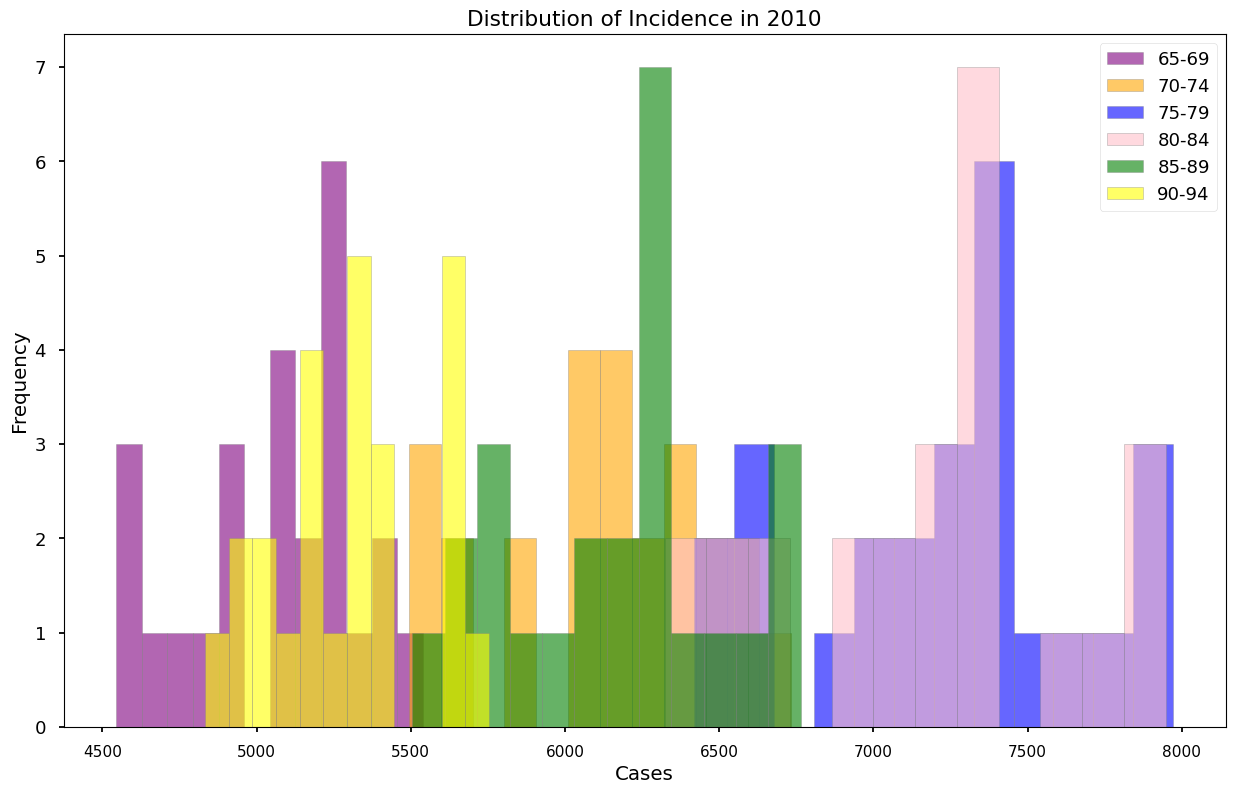

In [142]:
# Code from Graph Gallery https://python-graph-gallery.com/529-multi-group-histogram-pandas/

# Get group names and define colors
group_name = train_ov_2010['Age'].unique()
colors = ['purple', 'orange', 'blue', 'pink', 'green', 'yellow']

plt.rc('xtick', labelsize=11)

# Plot the histograms
for i, group in enumerate(group_name):
    ax = train_ov_2010[train_ov_2010['Age']==group]['Incidence'].hist(figsize=(15, 9),
                                        edgecolor='gray',
                                        bins=12,
                                        color=colors[i],
                                        alpha = 0.6,
                                        grid = False
                                                                      
                                       )

# Add a legend
ax.legend(group_name)

# Add a title and axis label
ax.set_title('Distribution of Incidence in 2010')
ax.set_xlabel('Cases')
ax.set_ylabel('Frequency')

# Show the plot
plt.show();

In [136]:
train_ov_2019 = train_ov[train_ov['Year']==2019]

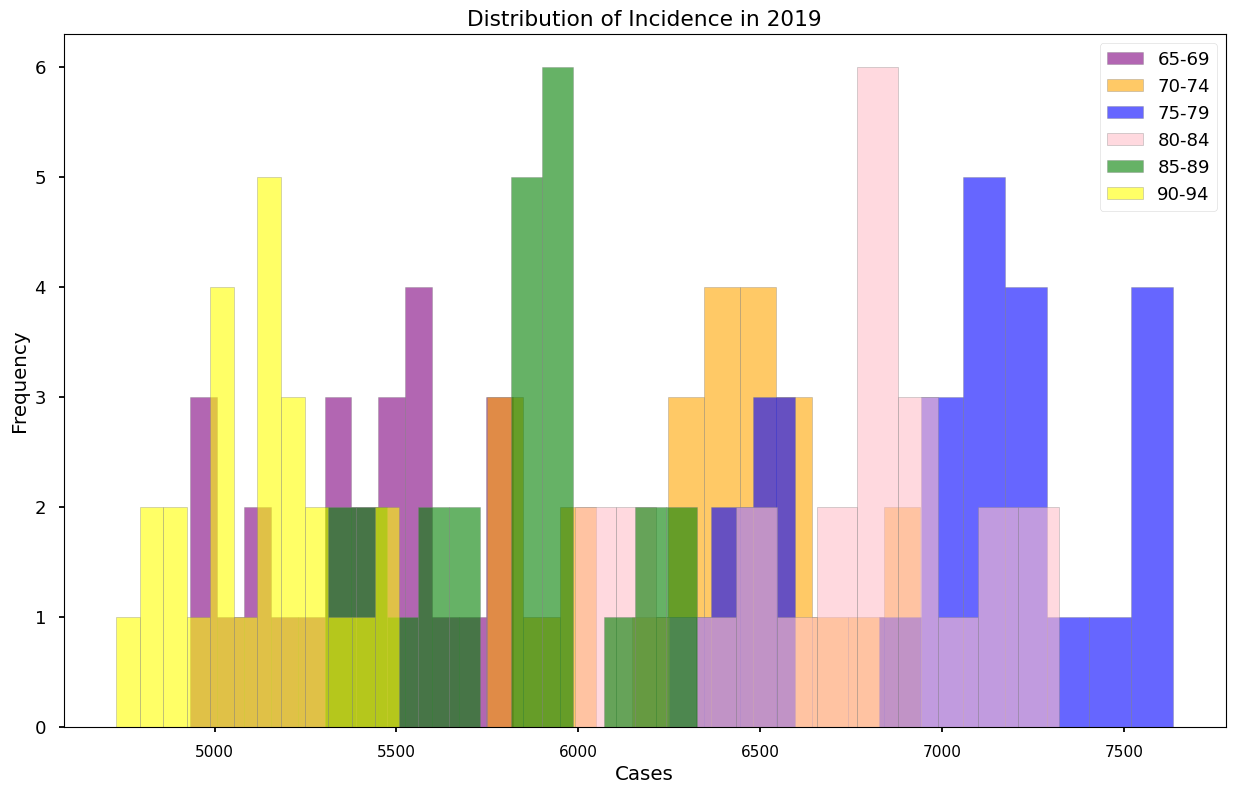

In [143]:
# Code from Graph Gallery https://python-graph-gallery.com/529-multi-group-histogram-pandas/

# Get group names and define colors
group_name = train_ov_2019['Age'].unique()
colors = ['purple', 'orange', 'blue', 'pink', 'green', 'yellow']

plt.rc('xtick', labelsize=11)

# Plot the histograms
for i, group in enumerate(group_name):
    ax = train_ov_2019[train_ov_2019['Age']==group]['Incidence'].hist(figsize=(15, 9),
                                        edgecolor='gray',
                                        bins=12,
                                        color=colors[i],
                                        alpha = 0.6,
                                        grid = False
                                                                      
                                       )

# Add a legend
ax.legend(group_name)

# Add a title and axis label
ax.set_title('Distribution of Incidence in 2019')
ax.set_xlabel('Cases')
ax.set_ylabel('Frequency')

# Show the plot
plt.show();